<a href="https://colab.research.google.com/github/bharat-mullapudi/LSTM_SOC_RUL/blob/main/Copy_of_Copy_of_implementation_1_SOC_LSTM_CALCE_IC2_45deg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [4]:
df = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/calce_incremental_INR_18650-20R/Incremental_temp_45.xlsx')

In [5]:
df

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000502,1.0,0.0,4.173664,0.0,0.0,1,0.97
1,20.016109,1.0,0.0,4.173664,0.0,0.0,10.0156,0.984508
2,30.031595,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
3,40.047191,1.0,0.0,4.173826,0.0,0.0,10.0156,0.984604
4,50.062737,1.0,0.0,4.173826,0.0,0.0,10.0155,0.984604
...,...,...,...,...,...,...,...,...
1048568,NaN,NaN,NaN,NaN,NaN,NaN,,
1048569,NaN,NaN,NaN,NaN,NaN,NaN,,
1048570,NaN,NaN,NaN,NaN,NaN,NaN,,
1048571,NaN,NaN,NaN,NaN,NaN,NaN,,


In [6]:
df=df.dropna()

In [ ]:
#not for all

ws1 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 1)
ws2 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 2)
ws3 = pd.read_excel('/content/drive/MyDrive/LSTM_SOC_Implementation/12_2_2015_Incremental_OCV_test_SP20-1.xlsx', sheet_name = 3)


In [ ]:
combined_data=ws1.append(ws2,ignore_index=True).append(ws3,ignore_index=True)
combined_data.shape

(142121, 19)

In [8]:
combined_data=df

In [9]:
combined_data.to_csv('Incremental_Init_45.csv')
combined_data=pd.read_csv('Incremental_Init_45.csv')

In [10]:
combined_data.describe()

,Unnamed: 0,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
count,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000
mean,79553.000000,87279.243341,10.493090,0.000390,3.735026,0.568921,1.542466,1.054046,0.722902
std,45930.378977,46456.798733,5.747789,0.295084,0.231053,0.687331,0.616400,0.621824,0.134872
min,0.000000,10.000502,1.000000,-1.000233,3.033892,0.000000,0.000000,0.000435,0.314054
25%,39776.500000,47094.959959,5.000000,0.000000,3.578578,0.014028,0.999794,1.000212,0.633599
50%,79553.000000,87297.368555,11.000000,0.000000,3.678893,0.138467,1.999575,1.015569,0.693371
75%,119329.500000,127494.672648,16.000000,0.000000,3.946941,1.213525,1.999575,1.015621,0.850189
max,159106.000000,167715.033539,19.000000,1.001522,4.328594,2.028843,1.999575,10.017457,1.000000


In [ ]:
combined_data.to_csv('merged0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('merged0.csv')

In [ ]:
###
combined_data=combined_data.drop_duplicates(subset=['Data_Point'])
combined_data.set_index('Data_Point',inplace=True)
#cd2=combined_data.drop(63990)
#cdcombined_data.drop(127979)

#cd2=combined_data;

In [11]:
combined_data=combined_data.iloc[:,1:] #drop first column
combined_data.shape
combined_data

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
0,10.000502,1.0,0.0,4.173664,0.000000,0.000000,1.000000,0.970000
1,20.016109,1.0,0.0,4.173664,0.000000,0.000000,10.015606,0.984508
2,30.031595,1.0,0.0,4.173826,0.000000,0.000000,10.015487,0.984604
3,40.047191,1.0,0.0,4.173826,0.000000,0.000000,10.015596,0.984604
4,50.062737,1.0,0.0,4.173826,0.000000,0.000000,10.015546,0.984604
...,...,...,...,...,...,...,...,...
159102,167711.283616,19.0,0.0,4.176743,2.028843,1.999575,1.015685,0.986319
159103,167712.283619,19.0,0.0,4.176581,2.028843,1.999575,1.000003,0.986224
159104,167713.299187,19.0,0.0,4.176581,2.028843,1.999575,1.015567,0.986224
159105,167714.314787,19.0,0.0,4.176581,2.028843,1.999575,1.015600,0.986224


In [ ]:
combined_data.to_csv('cd.csv')
files.download('cd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
display(combined_data.loc[63990])


In [ ]:
combined_data.hist()
plt.figure(figsize=(20,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa02c3fd750>,
      dtype=object)

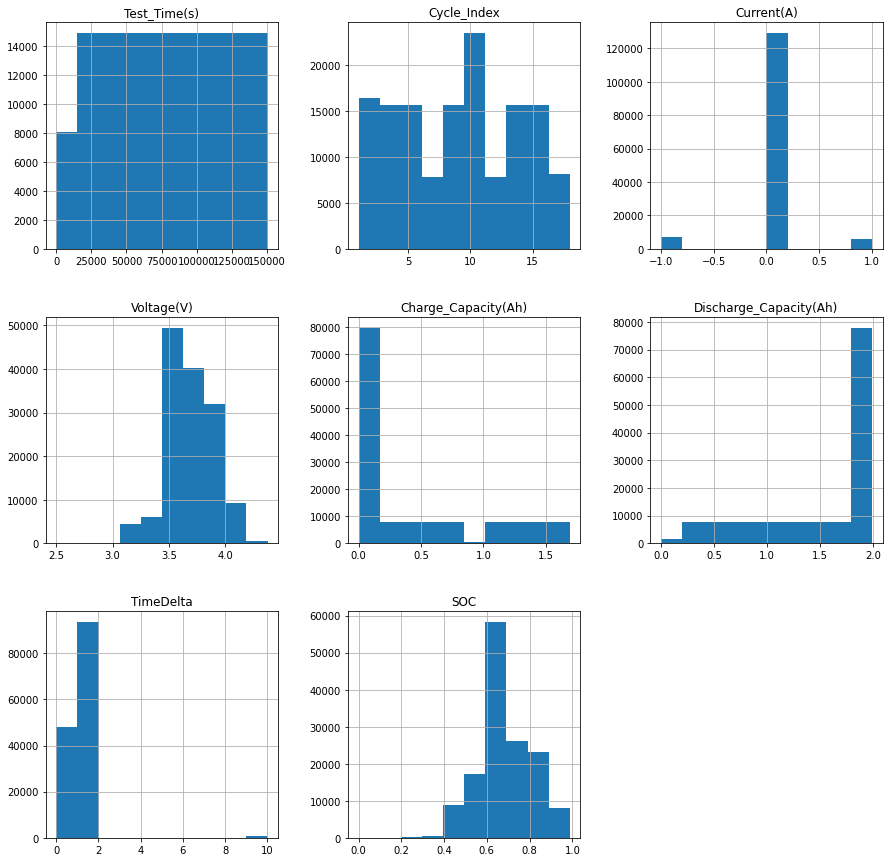

In [ ]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

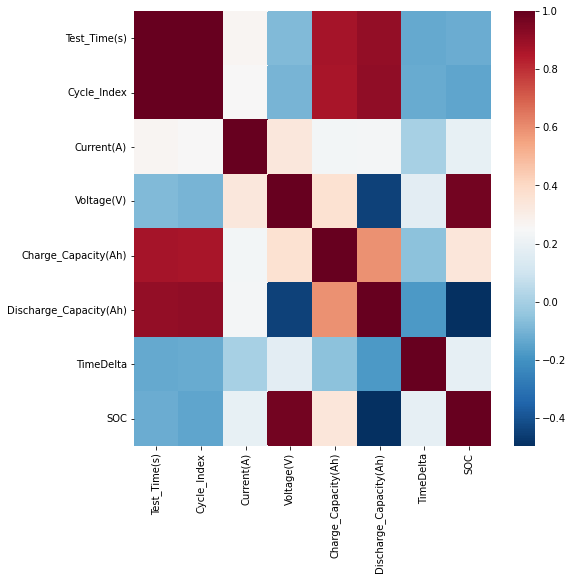

In [ ]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [ ]:
combined_data.describe()

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),TimeDelta,SOC
count,27602.000000,27602.0,27602.000000,27602.000000,27602.000000,27602.000000,27602.000000,27602.000000
mean,15040.741654,1.0,0.055701,3.897969,2.106916,0.804022,1.214452,0.842407
std,9710.525082,0.0,0.730714,0.324151,1.031030,0.891472,1.339952,0.200001
min,1.001205,1.0,-1.000525,2.499921,0.000000,0.000000,0.031246,0.000000
25%,6972.425579,1.0,-0.999981,3.640014,1.857298,0.000000,1.000245,0.642212
50%,13942.747873,1.0,0.042780,3.980649,1.996313,0.230640,1.015536,0.997103
75%,20916.228757,1.0,0.913817,4.199773,1.996313,2.009444,1.015616,1.000000
max,33521.293923,1.0,1.000313,4.200097,4.005512,2.009444,10.016820,1.000000


Deleting 0 valued columns

In [ ]:
combined_data=combined_data.drop(columns=['Internal_Resistance(Ohm)','Is_FC_Data','AC_Impedance(Ohm)',	'ACI_Phase_Angle(Deg)'])
combined_data.describe()

In [ ]:
correlations = combined_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [ ]:
  fig = plt.figure(figsize = (15,15))
  ax = fig.gca()
  combined_data.hist(ax = ax)

# ***Can run from here***

---



In [12]:
#cd2=pd.read_csv('/content/drive/MyDrive/LSTM_SOC_Implementation/r1.csv')
cd2=combined_data.drop(columns=['TimeDelta'])
cd2.describe()

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SOC
count,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000
mean,87279.243341,10.493090,0.000390,3.735026,0.568921,1.542466,0.722902
std,46456.798733,5.747789,0.295084,0.231053,0.687331,0.616400,0.134872
min,10.000502,1.000000,-1.000233,3.033892,0.000000,0.000000,0.314054
25%,47094.959959,5.000000,0.000000,3.578578,0.014028,0.999794,0.633599
50%,87297.368555,11.000000,0.000000,3.678893,0.138467,1.999575,0.693371
75%,127494.672648,16.000000,0.000000,3.946941,1.213525,1.999575,0.850189
max,167715.033539,19.000000,1.001522,4.328594,2.028843,1.999575,1.000000


In [13]:
cd2

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),SOC
0,10.000502,1.0,0.0,4.173664,0.000000,0.000000,0.970000
1,20.016109,1.0,0.0,4.173664,0.000000,0.000000,0.984508
2,30.031595,1.0,0.0,4.173826,0.000000,0.000000,0.984604
3,40.047191,1.0,0.0,4.173826,0.000000,0.000000,0.984604
4,50.062737,1.0,0.0,4.173826,0.000000,0.000000,0.984604
...,...,...,...,...,...,...,...
159102,167711.283616,19.0,0.0,4.176743,2.028843,1.999575,0.986319
159103,167712.283619,19.0,0.0,4.176581,2.028843,1.999575,0.986224
159104,167713.299187,19.0,0.0,4.176581,2.028843,1.999575,0.986224
159105,167714.314787,19.0,0.0,4.176581,2.028843,1.999575,0.986224


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad005d7a50>,
      dtype=object)

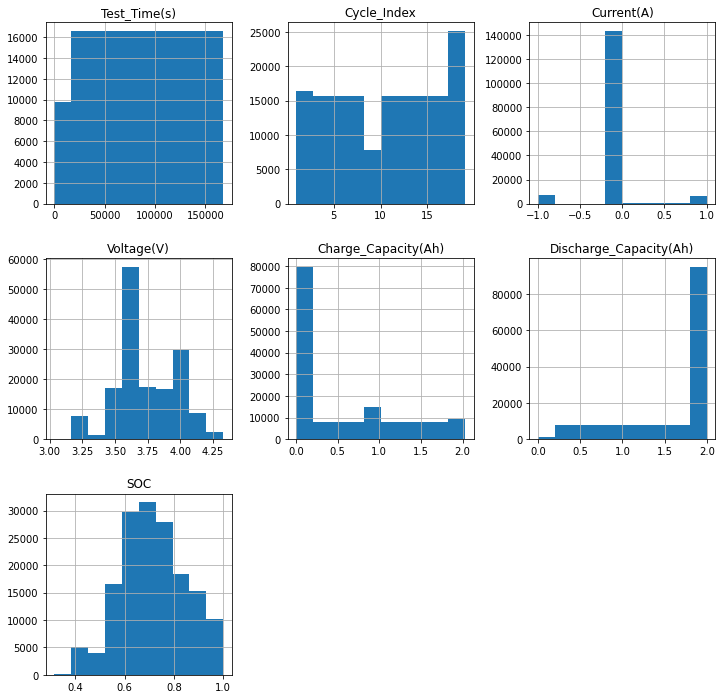

In [14]:
  fig = plt.figure(figsize = (12,12))
  ax = fig.gca()
  cd2.hist(ax = ax)

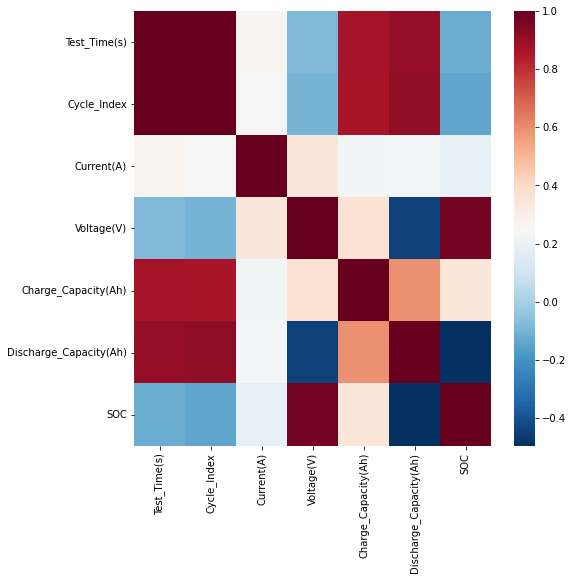

In [ ]:
correlations = cd2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [33]:
y = cd2.SOC
X = cd2.drop(['SOC'], axis=1)

In [34]:
X.describe()

,Test_Time(s),Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah)
count,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000,159107.000000
mean,87279.243341,10.493090,0.000390,3.735026,0.568921,1.542466
std,46456.798733,5.747789,0.295084,0.231053,0.687331,0.616400
min,10.000502,1.000000,-1.000233,3.033892,0.000000,0.000000
25%,47094.959959,5.000000,0.000000,3.578578,0.014028,0.999794
50%,87297.368555,11.000000,0.000000,3.678893,0.138467,1.999575
75%,127494.672648,16.000000,0.000000,3.946941,1.213525,1.999575
max,167715.033539,19.000000,1.001522,4.328594,2.028843,1.999575


split

In [ ]:
cd2.values

array([[1.00120490e+00, 0.00000000e+00, 3.43425655e+00, 0.00000000e+00,
        0.00000000e+00, 5.00000000e-01],
       [2.01676330e+00, 0.00000000e+00, 3.43441844e+00, 0.00000000e+00,
        0.00000000e+00, 5.49657906e-01],
       [3.03225394e+00, 0.00000000e+00, 3.43458056e+00, 0.00000000e+00,
        0.00000000e+00, 5.49753273e-01],
       ...,
       [3.35194814e+04, 0.00000000e+00, 4.19588470e+00, 4.00551180e+00,
        2.00944414e+00, 9.97579238e-01],
       [3.35204970e+04, 0.00000000e+00, 4.19588470e+00, 4.00551180e+00,
        2.00944414e+00, 9.97579238e-01],
       [3.35212939e+04, 0.00000000e+00, 4.19588470e+00, 4.00551180e+00,
        2.00944414e+00, 9.97579238e-01]])

In [17]:
from sklearn.preprocessing import MinMaxScaler


In [35]:
dataset = cd2.SOC.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [36]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [37]:
# reshape into X=t and Y=t+1
look_back = 6
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [38]:
X_train.shape

(127278, 6)

In [39]:
Y_train.shape

(127278,)

In [40]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [41]:
X_train.shape

(127278, 1, 6)

In [24]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [42]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.6))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/50
3978/3978 [==============================] - 23s 5ms/step - loss: 0.0114 - val_loss: 0.0172
Epoch 2/50
3978/3978 [==============================] - 21s 5ms/step - loss: 0.0016 - val_loss: 0.0265
Epoch 3/50
3978/3978 [==============================] - 21s 5ms/step - loss: 0.0014 - val_loss: 0.0294
Epoch 4/50
3978/3978 [==============================] - 21s 5ms/step - loss: 0.0014 - val_loss: 0.0267
Epoch 5/50
3978/3978 [==============================] - 22s 5ms/step - loss: 0.0013 - val_loss: 0.0268
Epoch 6/50
3978/3978 [==============================] - 22s 5ms/step - loss: 0.0013 - val_loss: 0.0260
Epoch 7/50
3978/3978 [==============================] - 22s 5ms/step - loss: 0.0013 - val_loss: 0.0258
Epoch 8/50
3978/3978 [==============================] - 22s 5ms/step - loss: 0.0013 - val_loss: 0.0254
Epoch 9/50
3978/3978 [==============================] - 21s 5ms/step - loss: 0.0012 - val_loss: 0.0252
Epoch 10/50
3978/3978 [==============================] - 21s 5ms/step - l

In [43]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 0.093277231899141
Train Root Mean Squared Error: 0.10117577252215415
Test Mean Absolute Error: 0.08126673827008718
Test Root Mean Squared Error: 0.10251687241601182


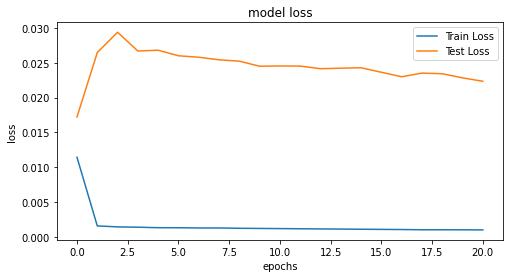

In [44]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

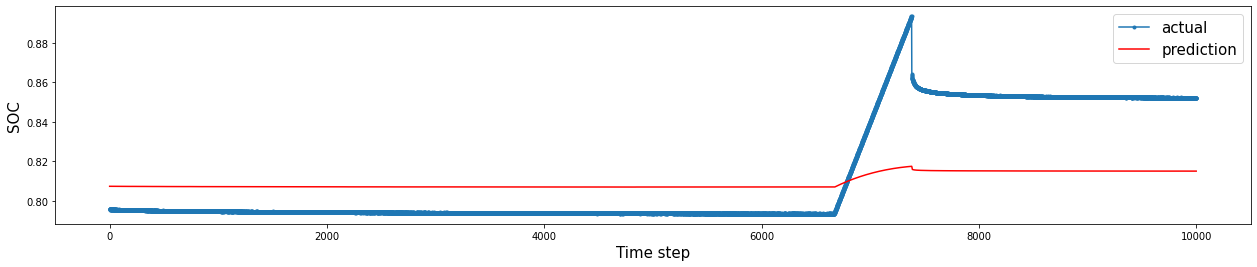

In [56]:
aa=[x for x in range(10000)]
plt.figure(figsize=(20,4))
plt.plot(aa, Y_test[0][:10000], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:10000], 'r', label="prediction")
#plt.tight_layout()
#sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
y.describe()

count    142119.000000
mean          0.691114
std           0.118811
min           0.000000
25%           0.633504
50%           0.672399
75%           0.787366
max           0.988512
Name: SOC, dtype: float64

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 1) #1 is seed for random state , useful for regenerating same

In [ ]:
X_train[1:5]

,Test_Time(s),Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah)
22706,28576.552241,0.824601,4.199935,3.778262,2.009444
18466,18658.375942,-1.000162,3.419675,1.996313,1.540662
16507,16678.177943,-1.000162,3.527577,1.996313,0.990547
22399,26972.366988,0.999950,3.982350,3.336901,2.009444


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:


#Creating Instance of StandarScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#Perform scaling in X_train with fit_transform.
#Here we are applying fit_transform because,
        # fit will calculate mean and standard deviation of X_train
        # transform will actually perform scaling with calculated mean and std.
        # fit_transform method does this both thing in one line of code.
X_train1 = scaler.fit_transform(X_train)

# Here we will only use transform because we have already calculated mean and std.
# Another reason is we don't want to know the mean and std of our test dataset As it
# Lead to information leakage.
X_test1 = scaler.transform(X_test)

In [ ]:
X_train1[1:5]

array([[0.35294118, 0.50008222, 0.62582368, 0.00954253, 0.70433413,
        0.01020189, 0.725581  ],
       [0.41176471, 0.50008222, 0.60076108, 0.00954253, 0.80495919,
        0.01020189, 0.82212311],
       [0.64705882, 0.50008222, 0.6355703 , 0.36398502, 1.        ,
        0.349739  , 1.        ],
       [0.35294118, 0.50008222, 0.62406014, 0.00954253, 0.70433413,
        0.01020189, 0.725581  ]])

In [ ]:
a1=X_train1.shape[0]
a2=X_train1.shape[1]
a3=X_test1.shape[0]
a4=X_test1.shape[1]

In [ ]:
X_train1

array([[0.60495156, 0.52941176, 0.50008222, ..., 1.        , 0.12107558,
        1.        ],
       [0.38259242, 0.35294118, 0.50008222, ..., 0.70433413, 0.01020189,
        0.725581  ],
       [0.43491065, 0.41176471, 0.50008222, ..., 0.80495919, 0.01020189,
        0.82212311],
       ...,
       [0.19091954, 0.11764706, 0.50008222, ..., 0.301847  , 0.01020189,
        0.32665175],
       [0.2913361 , 0.23529412, 0.50008222, ..., 0.50309009, 0.01020189,
        0.52929068],
       [0.99390948, 0.94117647, 0.50008222, ..., 1.        , 0.95138796,
        1.        ]])

In [ ]:
# reshape input to be [samples, time steps, features]
X_train2 = np.reshape(X_train1, (a1, 1, a2))
X_test2 = np.reshape(X_test1, (a3,1, a4))

In [ ]:
X_train2.shape

(85271, 1, 7)

In [ ]:
y_train2=y_train.to_numpy()
y_train2
y_test2=y_test.to_numpy()
y_test2

array([0.63207216, 0.42418453, 0.70184814, ..., 0.64467682, 0.65214965,
       0.61019394])

In [ ]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train2.shape[1], X_train2.shape[2])))
model.add(Dropout(0.6))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train2, y_train2, epochs=20, batch_size=32, validation_data=(X_test2, y_test2), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Training Phase
model.summary()

Epoch 1/20
2665/2665 [==============================] - 13s 4ms/step - loss: 0.0150 - val_loss: 3.9886e-04
Epoch 2/20
2665/2665 [==============================] - 10s 4ms/step - loss: 0.0011 - val_loss: 2.8477e-04
Epoch 3/20
2665/2665 [==============================] - 10s 4ms/step - loss: 6.2021e-04 - val_loss: 1.1893e-04
Epoch 4/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.7525e-04 - val_loss: 3.4772e-05
Epoch 5/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.4919e-04 - val_loss: 9.4581e-06
Epoch 6/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.5217e-04 - val_loss: 2.1717e-05
Epoch 7/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.3846e-04 - val_loss: 7.5175e-05
Epoch 8/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.3855e-04 - val_loss: 6.7489e-05
Epoch 9/20
2665/2665 [==============================] - 10s 4ms/step - loss: 4.2767e-04 - val_loss: 1.7911e-05
Epoch 10/

In [ ]:
X_train2.shape

(85271, 1, 7)

In [ ]:
# make predictions
train_predict = model.predict(X_train2)
test_predict = model.predict(X_test2)

In [ ]:
train_predict.shape

(85271, 2)

In [ ]:
train_predict.shape
train_predict=np.delete(train_predict,1,1) #1,1 1st 1 represents 2nd(0,1) and 2nd 1 represents axis =1 ie vertical ie columns
train_predict;

In [ ]:
test_predict=np.delete(test_predict,1,1) #1,1 1st 1 represents 2nd(0,1) and 2nd 1 represents axis =1 ie vertical ie columns

test_predict

array([[0.6305881 ],
       [0.43137866],
       [0.69799805],
       ...,
       [0.6452552 ],
       [0.65107596],
       [0.6093849 ]], dtype=float32)

In [ ]:
y_train.shape

(85271,)

In [ ]:
z = np.zeros((train_predict.shape[0],6), dtype=np.int64)
train_predict2=np.append(train_predict, z, axis=1)
train_predict2.shape

z = np.zeros((test_predict.shape[0],6), dtype=np.int64)
test_predict2=np.append(test_predict, z, axis=1)
test_predict2.shape

(56848, 7)

In [ ]:
# invert predictions

train_predict3 = scaler.inverse_transform(train_predict2)
#y_train = scaler.inverse_transform([y_train])
test_predict3 = scaler.inverse_transform(test_predict2)
#y_test = scaler.inverse_transform([y_test])

NameError: ignored

In [ ]:
train_predict2.shape

NameError: ignored

In [ ]:
train_predict3[:,0]

array([11.46641475, 11.15107423, 11.46227348, ..., 13.5930441 ,
       12.00150609, 14.48897624])

In [ ]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train, train_predict3[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train, train_predict3[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict3[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, test_predict3[:,0])))

Train Mean Absolute Error: 11.483963278837287
Train Root Mean Squared Error: 11.619462533194804
Test Mean Absolute Error: 11.489873426364861
Test Root Mean Squared Error: 11.62519924136153


In [ ]:
y_test3[1:5]

array([0.42418453, 0.70184814, 0.61028401, 0.74407392])

In [ ]:
test_predict3.shape


(56848, 7)

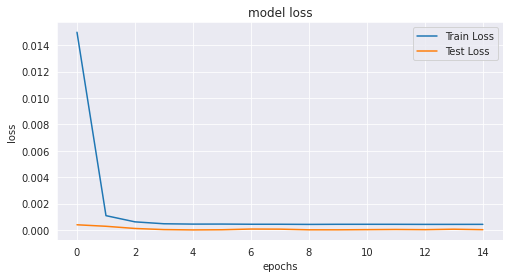

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
aa=[x for x in range(40)]
plt.figure(figsize=(18,15))
plt.plot(aa, 100*y_test3[20:60], marker='.', label="actual")
plt.plot(aa, 100*test_predict[:,0][20:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('SOC', size=8)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

NameError: ignored